<center><h1>DSCI-552 HW_8</h1></center>
<br>
<center><font size="4">Name: Jiade Song    GitHubID: JiadeSong     USCID: 9019610285 </font></center>

<center><font size="4">1. Supervised, Semi-Supervised, and Unsupervised Learning</font></center>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.cluster import SpectralClustering

### (b) Monte-Carlo Simulation: Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.

#### i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [2]:
column_name = ['ID','Diagnosis']
feature_names = ['radius','texture' ,'perimeter','area','smoothness','compactness','concavity',\
                 'concave_points' ,'symmetry','fractal_dimension']
for i in feature_names:
    for j in ['Mean', 'SE', 'Worst']:
        this_column = j+'_'+i
        column_name += [this_column]
        
file_path = r'../../Data/Data/wdbc.data'
dataset = pd.read_csv(file_path, delimiter=",",names=column_name)

In [3]:
dataset

,ID,Diagnosis,Mean_radius,SE_radius,Worst_radius,Mean_texture,SE_texture,Worst_texture,Mean_perimeter,SE_perimeter,...,Worst_concavity,Mean_concave_points,SE_concave_points,Worst_concave_points,Mean_symmetry,SE_symmetry,Worst_symmetry,Mean_fractal_dimension,SE_fractal_dimension,Worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
dia_data = dataset.drop(labels=['ID'],axis=1)

In [5]:
dia_data

,Diagnosis,Mean_radius,SE_radius,Worst_radius,Mean_texture,SE_texture,Worst_texture,Mean_perimeter,SE_perimeter,Worst_perimeter,...,Worst_concavity,Mean_concave_points,SE_concave_points,Worst_concave_points,Mean_symmetry,SE_symmetry,Worst_symmetry,Mean_fractal_dimension,SE_fractal_dimension,Worst_fractal_dimension
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
y_data = dia_data['Diagnosis']
X_data = dia_data.drop(labels=['Diagnosis'],axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=24,stratify=y_data)

In [8]:
y_train.value_counts()/len(y_train)

B    0.626374
M    0.373626
Name: Diagnosis, dtype: float64

In [9]:
y_test.value_counts()/len(y_test)

B    0.631579
M    0.368421
Name: Diagnosis, dtype: float64

In [10]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
X_train_norm_df = pd.DataFrame(X_train_norm, columns=X_train.columns)
X_test_norm_df = pd.DataFrame(X_test_norm, columns=X_test.columns)
X_train_norm_df

,Mean_radius,SE_radius,Worst_radius,Mean_texture,SE_texture,Worst_texture,Mean_perimeter,SE_perimeter,Worst_perimeter,Mean_area,...,Worst_concavity,Mean_concave_points,SE_concave_points,Worst_concave_points,Mean_symmetry,SE_symmetry,Worst_symmetry,Mean_fractal_dimension,SE_fractal_dimension,Worst_fractal_dimension
0,0.336157,-1.410560,0.266116,0.199219,-1.256387,-0.653471,-0.684988,-0.573002,-0.331334,-1.055168,...,0.005061,-1.599705,-0.065354,-0.090822,-0.881460,-0.504742,-0.648909,-0.492863,-0.658605,-0.898027
1,-1.122500,-0.423797,-1.116974,-0.964942,-1.188528,-0.845806,-0.388103,-0.988817,0.549883,0.029735,...,-0.985900,-0.210767,-0.941722,-0.846207,-1.642711,-0.714484,-0.385620,-1.191802,-0.060232,-0.330165
2,1.686658,0.655402,1.638599,1.833097,0.136585,-0.028713,0.736095,1.220561,-0.835406,-1.264832,...,2.339697,0.807895,2.413172,2.780332,0.814112,0.366922,1.226383,1.889326,-0.217285,-0.435788
3,-0.076009,-0.814343,-0.127598,-0.176019,-0.619557,-0.693923,-0.976511,-1.009083,-1.477280,-0.627398,...,-0.190192,-1.318422,-0.264118,-0.295398,-1.118665,-0.915589,-1.121379,-1.231095,-1.644898,-0.874071
4,-0.412172,0.334184,-0.391488,-0.490456,0.212646,0.312133,0.219882,0.308966,-0.280565,1.092125,...,-0.597494,-0.051849,-0.532148,-0.621265,-0.174240,-0.188278,-0.249532,-0.057145,-1.068513,0.038429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,1.794815,0.052252,1.799818,1.803293,1.254392,0.836510,1.551562,2.031217,-0.320455,-0.338935,...,1.229065,-0.115416,1.184449,1.109174,1.486192,0.238609,1.196453,1.563144,0.197335,-0.185341
451,-0.087701,-0.324428,-0.138205,-0.178701,-1.270555,-0.757972,-0.748829,-0.921175,-1.230684,-1.004511,...,-0.175495,-0.530191,-0.285500,-0.260302,-1.561886,-0.451072,-0.554443,-0.820410,-0.873767,-0.763003
452,-0.613870,-0.248167,-0.664712,-0.618019,-1.034168,-1.062299,-0.862171,-0.915931,0.201748,-0.258728,...,-0.645782,-0.709767,-0.692665,-0.621628,-0.802392,-1.026876,-0.855471,-0.778385,-0.190586,-0.548489
453,4.112882,-0.195016,4.120524,5.525866,1.321506,0.887075,2.883243,2.912136,-0.596062,-1.081904,...,2.505557,-1.164272,2.464368,2.963995,-0.811178,-0.641074,0.211107,0.686246,-1.976280,-1.573690


In [11]:
Ran_num = [random.randrange(1, 500000000, 1) for i in range(30)]
len(Ran_num)

30

In [12]:
train_acc_arr = []
test_acc_arr = []
train_prec_arr = []
test_prec_arr = []
train_rec_arr = []
test_rec_arr = []
train_f1_arr = []
test_f1_arr = []
train_auc_arr = []
test_auc_arr = []
for i in Ran_num:
    l1_svc = LinearSVC(penalty='l1',loss='squared_hinge',dual=False ,random_state=i)
    test_params = {'C':[0.03,0.032,0.033,0.034,0.035]}

    l1_svc_gs = GridSearchCV(estimator = l1_svc, param_grid = test_params,cv=5).\
    fit(X_train_norm_df,y_train)
    
    le = preprocessing.LabelEncoder()
    le.fit(y_train)
    
    pred_l1_gs_train = l1_svc_gs.predict(X_train_norm_df)
    pred_l1_gs_test = l1_svc_gs.predict(X_test_norm_df)
    train_acc = accuracy_score(y_train,pred_l1_gs_train)
    train_acc_arr.append(train_acc)
    test_acc = accuracy_score(y_test,pred_l1_gs_test)
    test_acc_arr.append(test_acc)
    train_prec = precision_score(y_train,pred_l1_gs_train,average='micro')
    train_prec_arr.append(train_prec)
    test_prec = precision_score(y_test,pred_l1_gs_test,average='micro')
    test_prec_arr.append(test_prec)
    train_rec = recall_score(y_train,pred_l1_gs_train,average='micro')
    train_rec_arr.append(train_rec)
    test_rec = recall_score(y_test,pred_l1_gs_test,average='micro')
    test_rec_arr.append(test_rec)
    train_f1 = f1_score(y_train,pred_l1_gs_train,average='micro')
    train_f1_arr.append(train_f1)
    test_f1 = f1_score(y_test,pred_l1_gs_test,average='micro')
    test_f1_arr.append(test_f1)
    train_auc = roc_auc_score(y_train,le.transform(pred_l1_gs_train))
    train_auc_arr.append(train_auc)
    test_auc = roc_auc_score(y_test,le.transform(pred_l1_gs_test))
    test_auc_arr.append(test_auc)
    

/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [13]:
print('Train scores: ')
print('Accuracy: '+str(np.average(train_acc_arr)))
print('Precision: '+str(np.average(train_prec_arr)))
print('Recall: '+str(np.average(train_rec_arr)))
print('F1: '+str(np.average(train_f1_arr)))
print('AUC: '+str(np.average(train_auc_arr)))

print('Test scores: ')
print('Accuracy: '+str(np.average(test_acc_arr)))
print('Precision: '+str(np.average(test_prec_arr)))
print('Recall: '+str(np.average(test_rec_arr)))
print('F1: '+str(np.average(test_f1_arr)))
print('AUC: '+str(np.average(test_auc_arr)))

Train scores: 
Accuracy: 0.9824175824175824
Precision: 0.9824175824175824
Recall: 0.9824175824175824
F1: 0.9824175824175824
AUC: 0.9776573787409705
Test scores: 
Accuracy: 0.9736842105263156
Precision: 0.9736842105263156
Recall: 0.9736842105263156
F1: 0.9736842105263156
AUC: 0.9692460317460317


/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


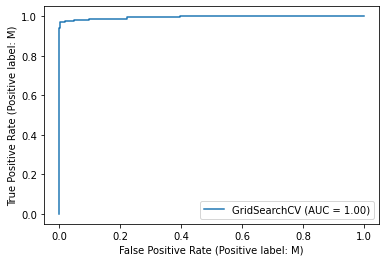

In [14]:
plot_roc_curve(l1_svc_gs, X_train_norm_df, y_train) 
plt.show()

/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


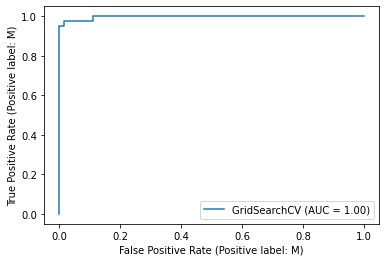

In [15]:
plot_roc_curve(l1_svc_gs, X_test_norm_df, y_test) 
plt.show()

In [16]:
print('train condfusion matrix: ')
confusion_matrix(y_train, pred_l1_gs_train)

train condfusion matrix: 


array([[284,   1],
       [  7, 163]])

In [17]:
print('test condfusion matrix: ')
confusion_matrix(y_test, pred_l1_gs_test)

test condfusion matrix: 


array([[71,  1],
       [ 2, 40]])

#### ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

##### A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.

In [18]:
rng = np.random.RandomState(24)
random_unlabeled_points = rng.rand(y_train.shape[0]) < 0.5
y_train[random_unlabeled_points] = -1
y_train.value_counts()/len(y_train)
# source: https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.SelfTrainingClassifier.html

-1    0.503297
B     0.305495
M     0.191209
Name: Diagnosis, dtype: float64

In [19]:
X_train_norm_df_labeled = X_train_norm_df.drop(index=X_train_norm_df[random_unlabeled_points].index)
y_train_labeled = y_train.drop(index=y_train[random_unlabeled_points].index)
X_train_norm_df_labeled

,Mean_radius,SE_radius,Worst_radius,Mean_texture,SE_texture,Worst_texture,Mean_perimeter,SE_perimeter,Worst_perimeter,Mean_area,...,Worst_concavity,Mean_concave_points,SE_concave_points,Worst_concave_points,Mean_symmetry,SE_symmetry,Worst_symmetry,Mean_fractal_dimension,SE_fractal_dimension,Worst_fractal_dimension
0,0.336157,-1.410560,0.266116,0.199219,-1.256387,-0.653471,-0.684988,-0.573002,-0.331334,-1.055168,...,0.005061,-1.599705,-0.065354,-0.090822,-0.881460,-0.504742,-0.648909,-0.492863,-0.658605,-0.898027
1,-1.122500,-0.423797,-1.116974,-0.964942,-1.188528,-0.845806,-0.388103,-0.988817,0.549883,0.029735,...,-0.985900,-0.210767,-0.941722,-0.846207,-1.642711,-0.714484,-0.385620,-1.191802,-0.060232,-0.330165
2,1.686658,0.655402,1.638599,1.833097,0.136585,-0.028713,0.736095,1.220561,-0.835406,-1.264832,...,2.339697,0.807895,2.413172,2.780332,0.814112,0.366922,1.226383,1.889326,-0.217285,-0.435788
5,-0.067239,1.025149,0.007741,-0.140552,2.671227,1.359015,0.834600,1.136140,1.590664,1.586031,...,0.634909,2.551220,0.657424,0.516359,3.950483,1.637095,0.886867,1.320404,2.396077,1.330955
6,-0.315708,-0.236613,-0.305363,-0.356932,-1.712757,-0.472748,-0.602194,-0.775928,0.223506,-0.555634,...,-0.429534,-0.188518,-0.312002,-0.449421,-1.729686,-0.146329,-0.535737,-0.731051,0.472177,-0.636146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,0.189999,-1.232619,0.290299,0.033208,0.493776,1.486364,0.699935,0.382114,0.992306,1.564924,...,0.059648,-1.184931,0.223757,-0.108825,-0.064423,0.666112,0.219524,-0.052593,-0.124624,0.431522
447,-0.280630,-0.832830,-0.243845,-0.372430,0.821885,0.426372,-0.538478,-0.454235,0.560763,0.727676,...,-0.351853,-0.843258,-0.318627,-0.433782,-0.064423,0.136205,-0.401988,-0.628645,0.436055,-0.126540
451,-0.087701,-0.324428,-0.138205,-0.178701,-1.270555,-0.757972,-0.748829,-0.921175,-1.230684,-1.004511,...,-0.175495,-0.530191,-0.285500,-0.260302,-1.561886,-0.451072,-0.554443,-0.820410,-0.873767,-0.763003
453,4.112882,-0.195016,4.120524,5.525866,1.321506,0.887075,2.883243,2.912136,-0.596062,-1.081904,...,2.505557,-1.164272,2.464368,2.963995,-0.811178,-0.641074,0.211107,0.686246,-1.976280,-1.573690


In [20]:
train_acc_arr = []
test_acc_arr = []
train_prec_arr = []
test_prec_arr = []
train_rec_arr = []
test_rec_arr = []
train_f1_arr = []
test_f1_arr = []
train_auc_arr = []
test_auc_arr = []
for i in Ran_num:
    l1_svc = LinearSVC(penalty='l1',loss='squared_hinge',dual=False ,random_state=i)
    test_params = {'C':[0.02,0.03,0.04, 0.05,0.06,0.07,0.1]}

    l1_svc_gs = GridSearchCV(estimator = l1_svc, param_grid = test_params,cv=5).\
    fit(X_train_norm_df_labeled,y_train_labeled)
    print(l1_svc_gs.best_estimator_)
    
    le = preprocessing.LabelEncoder()
    le.fit(y_train_labeled)
    
    pred_l1_gs_train = l1_svc_gs.predict(X_train_norm_df_labeled)
    pred_l1_gs_test = l1_svc_gs.predict(X_test_norm_df)
    train_acc = accuracy_score(y_train_labeled,pred_l1_gs_train)
    train_acc_arr.append(train_acc)
    test_acc = accuracy_score(y_test,pred_l1_gs_test)
    test_acc_arr.append(test_acc)
    train_prec = precision_score(y_train_labeled,pred_l1_gs_train,average='micro')
    train_prec_arr.append(train_prec)
    test_prec = precision_score(y_test,pred_l1_gs_test,average='micro')
    test_prec_arr.append(test_prec)
    train_rec = recall_score(y_train_labeled,pred_l1_gs_train,average='micro')
    train_rec_arr.append(train_rec)
    test_rec = recall_score(y_test,pred_l1_gs_test,average='micro')
    test_rec_arr.append(test_rec)
    train_f1 = f1_score(y_train_labeled,pred_l1_gs_train,average='micro')
    train_f1_arr.append(train_f1)
    test_f1 = f1_score(y_test,pred_l1_gs_test,average='micro')
    test_f1_arr.append(test_f1)
    train_auc = roc_auc_score(y_train_labeled,le.transform(pred_l1_gs_train))
    train_auc_arr.append(train_auc)
    test_auc = roc_auc_score(y_test,le.transform(pred_l1_gs_test))
    test_auc_arr.append(test_auc)

LinearSVC(C=0.06, dual=False, penalty='l1', random_state=8443008)
LinearSVC(C=0.06, dual=False, penalty='l1', random_state=160390951)
LinearSVC(C=0.06, dual=False, penalty='l1', random_state=311869477)
LinearSVC(C=0.06, dual=False, penalty='l1', random_state=496547442)
LinearSVC(C=0.06, dual=False, penalty='l1', random_state=180870768)
LinearSVC(C=0.06, dual=False, penalty='l1', random_state=445336289)
LinearSVC(C=0.06, dual=False, penalty='l1', random_state=318275370)
LinearSVC(C=0.06, dual=False, penalty='l1', random_state=342505757)
LinearSVC(C=0.06, dual=False, penalty='l1', random_state=439587497)
LinearSVC(C=0.06, dual=False, penalty='l1', random_state=185726978)
LinearSVC(C=0.06, dual=False, penalty='l1', random_state=52799365)
LinearSVC(C=0.06, dual=False, penalty='l1', random_state=124454811)
LinearSVC(C=0.06, dual=False, penalty='l1', random_state=355632828)
LinearSVC(C=0.06, dual=False, penalty='l1', random_state=388845676)
LinearSVC(C=0.06, dual=False, penalty='l1', random_

In [21]:
print('Train scores: ')
print('Accuracy: '+str(np.average(train_acc_arr)))
print('Precision: '+str(np.average(train_prec_arr)))
print('Recall: '+str(np.average(train_rec_arr)))
print('F1: '+str(np.average(train_f1_arr)))
print('AUC: '+str(np.average(train_auc_arr)))

print('Test scores: ')
print('Accuracy: '+str(np.average(test_acc_arr)))
print('Precision: '+str(np.average(test_prec_arr)))
print('Recall: '+str(np.average(test_rec_arr)))
print('F1: '+str(np.average(test_f1_arr)))
print('AUC: '+str(np.average(test_auc_arr)))

Train scores: 
Accuracy: 0.9955752212389378
Precision: 0.9955752212389378
Recall: 0.9955752212389378
F1: 0.9955752212389378
AUC: 0.9942528735632185
Test scores: 
Accuracy: 0.982456140350877
Precision: 0.982456140350877
Recall: 0.982456140350877
F1: 0.982456140350877
AUC: 0.9811507936507939


##### B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data andthe average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [22]:
X_train_norm_df_unlabeled = X_train_norm_df[random_unlabeled_points]
y_train_unlabeled = y_train[random_unlabeled_points]
y_train_unlabeled

442    -1
111    -1
187    -1
417    -1
226    -1
       ..
154    -1
380    -1
150    -1
432    -1
52     -1
Name: Diagnosis, Length: 229, dtype: object

In [23]:
# X_train_norm_df_unlabeled = X_train_norm_df_unlabeled.reset_index().drop(columns='index')
# X_train_norm_df_labeled = X_train_norm_df_labeled.reset_index().drop(columns='index')
# y_train_labeled = y_train_labeled.sort_index().reset_index().drop(columns='index')['Diagnosis']
# y_train_unlabeled = y_train_unlabeled.sort_index().reset_index().drop(columns='index')['Diagnosis']
# y_train_labeled

In [24]:
X_train_norm_df_labeled.iloc[129]

Mean_radius                1.604809
SE_radius                 -0.095647
Worst_radius               1.617386
Mean_texture               1.704938
SE_texture                 1.381162
Worst_texture              1.123045
Mean_perimeter             1.631363
SE_perimeter               1.514725
Worst_perimeter           -0.073859
Mean_area                  0.363227
SE_area                    2.647727
Worst_area                -0.109130
Mean_smoothness            2.250063
SE_smoothness              2.268813
Worst_smoothness          -0.331006
Mean_compactness           0.371312
SE_compactness             0.756091
Worst_compactness          0.892954
Mean_concavity            -0.194802
SE_concavity               0.387773
Worst_concavity            2.047868
Mean_concave_points        0.070517
SE_concave_points          1.940355
Worst_concave_points       2.152966
Mean_symmetry              0.739437
SE_symmetry                0.962836
Worst_symmetry             1.576656
Mean_fractal_dimension     1

In [25]:

for i in range(0,229):
    l1_svc = LinearSVC(penalty='l1',loss='squared_hinge',dual=False ,random_state=i)
    test_params = {'C':[0.02,0.03,0.04, 0.05,0.06,0.07,0.1]}
#     print(i)
    l1_svc_gs = GridSearchCV(estimator = l1_svc, param_grid = test_params,cv=5).\
    fit(X_train_norm_df_labeled,y_train_labeled)
#     print(l1_svc_gs.best_estimator_)
    max_dis = max(abs(l1_svc_gs.decision_function(X_train_norm_df_unlabeled)))
#     print(max_dis)
    max_ind = np.where(abs(l1_svc_gs.decision_function(X_train_norm_df_unlabeled)) == max_dis)[0][0]
#     print(abs(l1_svc_gs.decision_function(X_train_norm_df_unlabeled)))
#     print(X_train_norm_df_unlabeled.index[max_ind])
    real_ind = X_train_norm_df_unlabeled.index[max_ind]
    y_train_labeled.loc[max(y_train_labeled.index)+1] = l1_svc_gs.predict(X_train_norm_df_unlabeled.\
                                                                          iloc[max_ind:max_ind+1])[0]
    X_train_norm_df_labeled.loc[max(X_train_norm_df_labeled.index)+1] = X_train_norm_df_unlabeled.iloc[max_ind]
    X_train_norm_df_unlabeled = X_train_norm_df_unlabeled.drop(index=real_ind)
    
    

In [26]:
train_acc_arr = []
test_acc_arr = []
train_prec_arr = []
test_prec_arr = []
train_rec_arr = []
test_rec_arr = []
train_f1_arr = []
test_f1_arr = []
train_auc_arr = []
test_auc_arr = []
for i in Ran_num:
    l1_svc = LinearSVC(penalty='l1',loss='squared_hinge',dual=False ,random_state=i)
    test_params = {'C':[0.02,0.03,0.04, 0.05,0.06,0.07,0.1]}

    l1_svc_gs = GridSearchCV(estimator = l1_svc, param_grid = test_params,cv=5).\
    fit(X_train_norm_df_labeled,y_train_labeled)
    print(l1_svc_gs.best_estimator_)
    
    le = preprocessing.LabelEncoder()
    le.fit(y_train_labeled)
    
    pred_l1_gs_train = l1_svc_gs.predict(X_train_norm_df_labeled)
    pred_l1_gs_test = l1_svc_gs.predict(X_test_norm_df)
    train_acc = accuracy_score(y_train_labeled,pred_l1_gs_train)
    train_acc_arr.append(train_acc)
    test_acc = accuracy_score(y_test,pred_l1_gs_test)
    test_acc_arr.append(test_acc)
    train_prec = precision_score(y_train_labeled,pred_l1_gs_train,average='micro')
    train_prec_arr.append(train_prec)
    test_prec = precision_score(y_test,pred_l1_gs_test,average='micro')
    test_prec_arr.append(test_prec)
    train_rec = recall_score(y_train_labeled,pred_l1_gs_train,average='micro')
    train_rec_arr.append(train_rec)
    test_rec = recall_score(y_test,pred_l1_gs_test,average='micro')
    test_rec_arr.append(test_rec)
    train_f1 = f1_score(y_train_labeled,pred_l1_gs_train,average='micro')
    train_f1_arr.append(train_f1)
    test_f1 = f1_score(y_test,pred_l1_gs_test,average='micro')
    test_f1_arr.append(test_f1)
    train_auc = roc_auc_score(y_train_labeled,le.transform(pred_l1_gs_train))
    train_auc_arr.append(train_auc)
    test_auc = roc_auc_score(y_test,le.transform(pred_l1_gs_test))
    test_auc_arr.append(test_auc)

LinearSVC(C=0.03, dual=False, penalty='l1', random_state=8443008)
LinearSVC(C=0.03, dual=False, penalty='l1', random_state=160390951)
LinearSVC(C=0.03, dual=False, penalty='l1', random_state=311869477)
LinearSVC(C=0.03, dual=False, penalty='l1', random_state=496547442)
LinearSVC(C=0.03, dual=False, penalty='l1', random_state=180870768)
LinearSVC(C=0.03, dual=False, penalty='l1', random_state=445336289)
LinearSVC(C=0.03, dual=False, penalty='l1', random_state=318275370)
LinearSVC(C=0.03, dual=False, penalty='l1', random_state=342505757)
LinearSVC(C=0.03, dual=False, penalty='l1', random_state=439587497)
LinearSVC(C=0.03, dual=False, penalty='l1', random_state=185726978)
LinearSVC(C=0.03, dual=False, penalty='l1', random_state=52799365)
LinearSVC(C=0.03, dual=False, penalty='l1', random_state=124454811)
LinearSVC(C=0.03, dual=False, penalty='l1', random_state=355632828)
LinearSVC(C=0.03, dual=False, penalty='l1', random_state=388845676)
LinearSVC(C=0.03, dual=False, penalty='l1', random_

In [27]:
print('Train scores: ')
print('Accuracy: '+str(np.average(train_acc_arr)))
print('Precision: '+str(np.average(train_prec_arr)))
print('Recall: '+str(np.average(train_rec_arr)))
print('F1: '+str(np.average(train_f1_arr)))
print('AUC: '+str(np.average(train_auc_arr)))

print('Test scores: ')
print('Accuracy: '+str(np.average(test_acc_arr)))
print('Precision: '+str(np.average(test_prec_arr)))
print('Recall: '+str(np.average(test_rec_arr)))
print('F1: '+str(np.average(test_f1_arr)))
print('AUC: '+str(np.average(test_auc_arr)))

Train scores: 
Accuracy: 0.9912087912087912
Precision: 0.9912087912087912
Recall: 0.9912087912087912
F1: 0.9912087912087912
AUC: 0.9906524776070343
Test scores: 
Accuracy: 0.9385964912280699
Precision: 0.9385964912280699
Recall: 0.9385964912280699
F1: 0.9385964912280699
AUC: 0.9365079365079365


/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


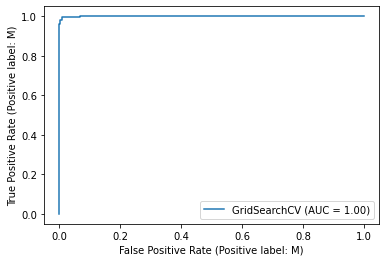

In [28]:
plot_roc_curve(l1_svc_gs, X_train_norm_df_labeled, y_train_labeled) 
plt.show()

/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


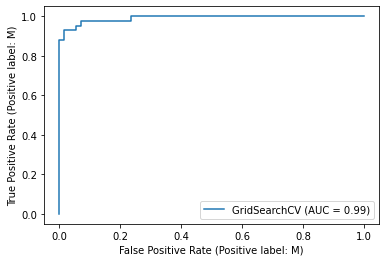

In [29]:
plot_roc_curve(l1_svc_gs, X_test_norm_df, y_test) 
plt.show()

In [30]:
print('train condfusion matrix: ')
confusion_matrix(y_train_labeled, pred_l1_gs_train)

train condfusion matrix: 


array([[281,   2],
       [  2, 170]])

In [31]:

print('test condfusion matrix: ')
confusion_matrix(y_test, pred_l1_gs_test)

test condfusion matrix: 


array([[68,  4],
       [ 3, 39]])

#### iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

#####  A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

Increse the number of initiatives.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=24,stratify=y_data)

In [33]:
train_acc_arr = []
train_prec_arr = []
train_rec_arr = []
train_f1_arr = []
train_auc_arr = []
for i in Ran_num:
    kmeans = KMeans(n_clusters=2, random_state=i,n_init = 50).fit(X_train)
    dist_ = kmeans.transform(X_train)
    pred_ = kmeans.predict(X_train)
    df1 = pd.DataFrame(dist_,columns=['dist_to_C1','dist_to_C2'])
    df1['true_label'] = y_train.values
    df1['pred_label'] = pred_
    close_to_c1 = df1.sort_values(by='dist_to_C1')[:30]
    close_to_c2 = df1.sort_values(by='dist_to_C2')[:30]
    c1_label = close_to_c1['true_label'].mode()[0]
#     print(c1_label)
    c2_label = close_to_c2['true_label'].mode()[0]

    df1['pre_label_encode'] = df1['pred_label'].replace([0,1], [c1_label,c2_label])
    df1['true_label_encode'] = df1['true_label'].replace(['M','B'], [0,1])
    df1['pre_label_encode2'] = df1['pre_label_encode'].replace(['M','B'], [0,1])    
    train_acc = accuracy_score(df1['true_label_encode'],df1['pre_label_encode2'])
    train_acc_arr.append(train_acc)
    train_prec = precision_score(df1['true_label_encode'],df1['pre_label_encode2'],average='micro')
    train_prec_arr.append(train_prec)
    train_rec = recall_score(df1['true_label_encode'],df1['pre_label_encode2'],average='micro')
    train_rec_arr.append(train_rec)
    train_f1 = f1_score(df1['true_label_encode'],df1['pre_label_encode2'],average='micro')
    train_f1_arr.append(train_f1)
    train_auc = roc_auc_score(df1['true_label_encode'],df1['pre_label_encode2'])
    train_auc_arr.append(train_auc)

In [34]:
print('Train scores: ')
print('Accuracy: '+str(np.average(train_acc_arr)))
print('Precision: '+str(np.average(train_prec_arr)))
print('Recall: '+str(np.average(train_rec_arr)))
print('F1: '+str(np.average(train_f1_arr)))
print('AUC: '+str(np.average(train_auc_arr)))

Train scores: 
Accuracy: 0.8461538461538463
Precision: 0.8461538461538463
Recall: 0.8461538461538463
F1: 0.8461538461538463
AUC: 0.7953044375644996


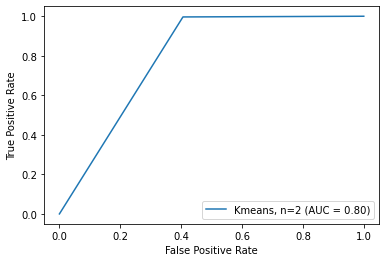

In [35]:
fpr, tpr, thresholds = metrics.roc_curve(df1['true_label_encode'], df1['pre_label_encode2'])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Kmeans, n=2')
display.plot()
plt.show()
# source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html

In [36]:
confusion_matrix(df1['true_label_encode'], df1['pre_label_encode2'])

array([[101,  69],
       [  1, 284]])

##### C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.

In [37]:
test_acc_arr = []
test_prec_arr = []
test_rec_arr = []
test_f1_arr = []
test_auc_arr = []
for i in Ran_num:
    kmeans = KMeans(n_clusters=2, random_state=i,n_init = 50).fit(X_train)
    dist_ = kmeans.transform(X_test)
    pred_ = kmeans.predict(X_test)
    df1 = pd.DataFrame(dist_,columns=['dist_to_C1','dist_to_C2'])
    df1['true_label'] = y_test.values
    df1['pred_label'] = np.nan
    for i in range(0,len(df1)):
        if df1['dist_to_C1'][i] < df1['dist_to_C2'][i]:
            df1['pred_label'][i] = 0
        else:
            df1['pred_label'][i] = 1
    M_encode = df1[df1['true_label']=='M']['pred_label'].mode()[0]
    B_encode = df1[df1['true_label']=='B']['pred_label'].mode()[0]
    df1['true_label_encode'] = df1['true_label']
    df1['true_label_encode'] = df1['true_label_encode'].replace(['M','B'], [M_encode,B_encode])
    

    test_acc = accuracy_score(df1['true_label_encode'],df1['pred_label'])
    test_acc_arr.append(test_acc)
    test_prec = precision_score(df1['true_label_encode'],df1['pred_label'],average='micro')
    test_prec_arr.append(test_prec)
    test_rec = recall_score(df1['true_label_encode'],df1['pred_label'],average='micro')
    test_rec_arr.append(test_rec)
    test_f1 = f1_score(df1['true_label_encode'],df1['pred_label'],average='micro')
    test_f1_arr.append(test_f1)
    test_auc = roc_auc_score(df1['true_label_encode'],df1['pred_label'])
    test_auc_arr.append(test_auc)

/var/folders/c2/55q5nzv51vz59zgdv6yql13m0000gn/T/ipykernel_6450/2181955368.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pred_label'][i] = 0
/var/folders/c2/55q5nzv51vz59zgdv6yql13m0000gn/T/ipykernel_6450/2181955368.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pred_label'][i] = 1
/var/folders/c2/55q5nzv51vz59zgdv6yql13m0000gn/T/ipykernel_6450/2181955368.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['

/var/folders/c2/55q5nzv51vz59zgdv6yql13m0000gn/T/ipykernel_6450/2181955368.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pred_label'][i] = 0
/var/folders/c2/55q5nzv51vz59zgdv6yql13m0000gn/T/ipykernel_6450/2181955368.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pred_label'][i] = 1
/var/folders/c2/55q5nzv51vz59zgdv6yql13m0000gn/T/ipykernel_6450/2181955368.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['

/var/folders/c2/55q5nzv51vz59zgdv6yql13m0000gn/T/ipykernel_6450/2181955368.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pred_label'][i] = 0
/var/folders/c2/55q5nzv51vz59zgdv6yql13m0000gn/T/ipykernel_6450/2181955368.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pred_label'][i] = 1
/var/folders/c2/55q5nzv51vz59zgdv6yql13m0000gn/T/ipykernel_6450/2181955368.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['

In [38]:
print('Test scores: ')
print('Accuracy: '+str(np.average(test_acc_arr)))
print('Precision: '+str(np.average(test_prec_arr)))
print('Recall: '+str(np.average(test_rec_arr)))
print('F1: '+str(np.average(test_f1_arr)))
print('AUC: '+str(np.average(test_auc_arr)))

Test scores: 
Accuracy: 0.8859649122807018
Precision: 0.8859649122807018
Recall: 0.8859649122807018
F1: 0.8859649122807018
AUC: 0.8452380952380951


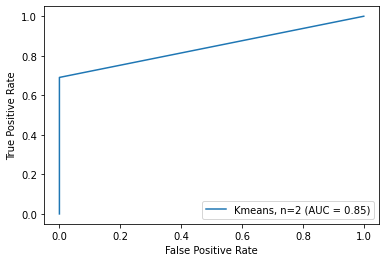

In [39]:
fpr, tpr, thresholds = metrics.roc_curve(df1['true_label_encode'],df1['pred_label'])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Kmeans, n=2')
display.plot()
plt.show()
# source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html

In [40]:
confusion_matrix(df1['true_label_encode'],df1['pred_label'])

array([[72,  0],
       [13, 29]])

#### iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels.3 Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit − predict method.

In [41]:
X_train
# Here used all the train data

,Mean_radius,SE_radius,Worst_radius,Mean_texture,SE_texture,Worst_texture,Mean_perimeter,SE_perimeter,Worst_perimeter,Mean_area,...,Worst_concavity,Mean_concave_points,SE_concave_points,Worst_concave_points,Mean_symmetry,SE_symmetry,Worst_symmetry,Mean_fractal_dimension,SE_fractal_dimension,Worst_fractal_dimension
371,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.026570,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.11260,0.17370,0.13620,0.08178,0.2487,0.06766
217,10.20,17.48,65.05,321.2,0.08054,0.05907,0.05774,0.010710,0.1964,0.06315,...,11.48,24.47,75.40,403.7,0.09527,0.13970,0.19250,0.03571,0.2868,0.07809
18,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.094980,0.1582,0.05395,...,27.32,30.88,186.80,2398.0,0.15120,0.31500,0.53720,0.23880,0.2768,0.07615
442,13.78,15.79,88.37,585.9,0.08817,0.06718,0.01055,0.009937,0.1405,0.05848,...,15.27,17.50,97.90,706.6,0.10720,0.10710,0.03517,0.03312,0.1859,0.06810
111,12.63,20.76,82.15,480.4,0.09933,0.12090,0.10650,0.060210,0.1735,0.07070,...,13.33,25.47,89.00,527.4,0.12870,0.22500,0.22160,0.11050,0.2226,0.08486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,20.18,19.54,133.80,1250.0,0.11330,0.14890,0.21330,0.125900,0.1724,0.06053,...,22.03,25.07,146.00,1479.0,0.16650,0.29420,0.53080,0.21730,0.3032,0.08075
149,13.74,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.013290,0.1473,0.05580,...,15.34,22.46,97.19,725.9,0.09711,0.18240,0.15640,0.06019,0.2350,0.07014
52,11.94,18.24,75.71,437.6,0.08261,0.04751,0.01972,0.013490,0.1868,0.06110,...,13.10,21.33,83.67,527.2,0.11440,0.08906,0.09203,0.06296,0.2785,0.07408
212,28.11,18.47,188.50,2499.0,0.11420,0.15160,0.32010,0.159500,0.1648,0.05525,...,28.11,18.47,188.50,2499.0,0.11420,0.15160,0.32010,0.15950,0.1648,0.05525


In [42]:
train_acc_arr = []
train_prec_arr = []
train_rec_arr = []
train_f1_arr = []
train_auc_arr = []
for i in Ran_num:
    SC = SpectralClustering(n_clusters=2,gamma=0.00000001, random_state=i,assign_labels='discretize',\
                                eigen_solver='arpack').fit_predict(X_train)

    df1 = pd.DataFrame(SC,columns=['pre_label'])
    df1['true_label'] = y_train.values
    label_0 = df1[df1['pre_label'] == 0]['true_label'].mode()[0]
    label_1 = df1[df1['pre_label'] == 1]['true_label'].mode()[0]
    df1['pre_label_encoded'] = df1['pre_label'].replace([0,1], [label_0,label_1])
    df1['true_label_encoded'] = df1['true_label'].replace(['B','M'], [0,1])
    df1['pre_label_encoded2'] = df1['pre_label_encoded'].replace(['B','M'], [0,1])

    train_acc = accuracy_score(df1['true_label_encoded'],df1['pre_label_encoded2'])
    train_acc_arr.append(train_acc)
    train_prec = precision_score(df1['true_label_encoded'],df1['pre_label_encoded2'],average='micro')
    train_prec_arr.append(train_prec)
    train_rec = recall_score(df1['true_label_encoded'],df1['pre_label_encoded2'],average='micro')
    train_rec_arr.append(train_rec)
    train_f1 = f1_score(df1['true_label_encoded'],df1['pre_label_encoded2'],average='micro')
    train_f1_arr.append(train_f1)
    train_auc = roc_auc_score(df1['true_label_encoded'],df1['pre_label_encoded2'])
    train_auc_arr.append(train_auc)

In [43]:
print('Train scores: ')
print('Accuracy: '+str(np.average(train_acc_arr)))
print('Precision: '+str(np.average(train_prec_arr)))
print('Recall: '+str(np.average(train_rec_arr)))
print('F1: '+str(np.average(train_f1_arr)))
print('AUC: '+str(np.average(train_auc_arr)))

Train scores: 
Accuracy: 0.8791208791208792
Precision: 0.8791208791208792
Recall: 0.8791208791208792
F1: 0.8791208791208792
AUC: 0.8417956656346747


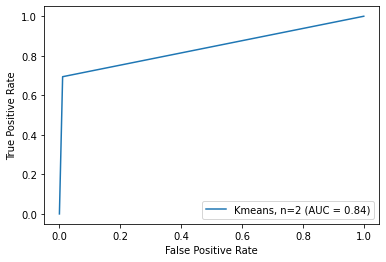

In [44]:
fpr, tpr, thresholds = metrics.roc_curve(df1['true_label_encoded'], df1['pre_label_encoded2'])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Kmeans, n=2')
display.plot()
plt.show()
# source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html

In [45]:
confusion_matrix(df1['true_label_encoded'], df1['pre_label_encoded2'])

array([[282,   3],
       [ 52, 118]])

#### v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

Supervised-training F1-score: 0.9824

Semi-supervised training F1-score: 0.9912

Unsupervised training F1-score: 0.8791

For expection 1: ''supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled'' is not correct in my methods.

For expection 2: ''unsupervised learning underperforms in such situations'' is correct. 

<center><font size="4">2. Active Learning Using Support Vector Machines</font></center>

In [46]:
feature_names2 = ['variance', 'skewness', 'curtosis', 'entropy', 'class' ]
file_path2 = r'../../Data/Data/data_banknote_authentication.txt'
dataset2 = pd.read_csv(file_path2, delimiter=",",names = feature_names2)

In [47]:
dataset2

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [48]:
y_data2 = dataset2['class']
X_data2 = dataset2.drop(labels=['class'],axis=1)

In [49]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_data2, y_data2, test_size=472, \
                                                        random_state=24)

In [50]:
y_train2

407    0
424    0
691    0
715    0
685    0
      ..
145    0
343    0
192    0
899    1
418    0
Name: class, Length: 900, dtype: int64

### (b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

#### i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation.4 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [51]:
Ran_num2 = [random.randrange(1, 500000000, 1) for i in range(50)]
len(Ran_num2)

50

In [52]:
for n in range(0,90):
    locals() ['passive_error'+str(n)]  = []
        
for i in Ran_num:
    samp_X_train2 = X_train2.sample(frac=1,random_state=i)
    samp_y_train2 = y_train2.sample(frac=1,random_state=i)
    for j in range(0,90):
        locals() ['x_train_set'+str(j)] = samp_X_train2.iloc[:10*(j+1)]
        locals() ['y_train_set'+str(j)] = samp_y_train2.iloc[:10*(j+1)]
        l1_svc2 = LinearSVC(penalty='l1',loss='squared_hinge',dual=False ,random_state=i,max_iter=100000)
        test_params2 = {'C':[0.01,0.05,0.1,0.5,1,5,10,50,100]}
    
        l1_svc_gs2 = GridSearchCV(estimator = l1_svc2, param_grid = test_params2,cv=5).\
        fit(locals() ['x_train_set'+str(j)],locals()['y_train_set'+str(j)])
        pre_test = l1_svc_gs2.predict(X_test2)
        test_f1 = f1_score(y_test2,pre_test,average='micro')
        (locals() ['passive_error'+str(j)]).append(test_f1)


/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
9 fits failed out of a total of 45.
Th

In [53]:
for n in range(0,90):
    locals() ['passive_error'+str(n)+'_average'] = np.average(locals() ['passive_error'+str(n)])
passive_error80_average

0.9915254237288135

#### Traina SVM with a pool of 10 randomly selected data points from the training set5 using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM6 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [54]:
for n in range(0,90):
    locals() ['active_error'+str(n)]  = []
        
for i in Ran_num:
    samp_X_train2 = X_train2.sample(frac=1,random_state=i)
    samp_y_train2 = y_train2.sample(frac=1,random_state=i)
    selected_x = samp_X_train2.iloc[:10]
    selected_y = samp_y_train2.iloc[:10]
    samp_X_train2 = samp_X_train2.drop(selected_x.index)
    samp_y_train2 = samp_y_train2.drop(selected_y.index)
    
    update_X_train2 = selected_x
    update_y_train2 = selected_y

    for j in range(0,90):
        
        l1_svc = LinearSVC(penalty='l1',loss='squared_hinge',dual=False ,random_state=i,max_iter=1000000)
        test_params2 = {'C':[0.01,0.05,0.1,0.5,1,5,10,50,100]}
    
        l1_svc_gs2 = GridSearchCV(estimator = l1_svc2, param_grid = test_params2,cv=5).\
        fit(update_X_train2,update_y_train2)
        
        if j < 89:
            closest_10 = np.argsort((abs(l1_svc_gs2.decision_function(samp_X_train2))))[:10]
            selected_x = samp_X_train2.iloc[closest_10]
            selected_y = samp_y_train2.iloc[closest_10]

            samp_X_train2 = samp_X_train2.drop(selected_x.index)
            samp_y_train2 = samp_y_train2.drop(selected_y.index)

            update_X_train2 = pd.concat([update_X_train2, selected_x])
            update_y_train2 = pd.concat([update_y_train2, selected_y])
        
        pre_test = l1_svc_gs2.predict(X_test2)
        test_f1 = f1_score(y_test2,pre_test,average='micro')
        (locals() ['active_error'+str(j)]).append(test_f1)
        

/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/pyt

/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/pyt

/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/s

/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/s

/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong

/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/s

/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/s

In [55]:
for n in range(0,90):
    locals() ['active_error'+str(n)+'_average'] = np.average(locals() ['active_error'+str(n)])
active_error80_average

0.9877824858757059

In [56]:
active_error1_average

0.9425141242937854

### (c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

In [57]:
np.array(range(0,90))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89])

In [58]:
act_array = []
for i in range(0,90):
    act_array.append(1-(locals() ['active_error'+str(i)+'_average']))
    
pas_array = []
for i in range(0,90):
    pas_array.append(1-(locals() ['passive_error'+str(i)+'_average']))

Text(0, 0.5, 'Test Error')

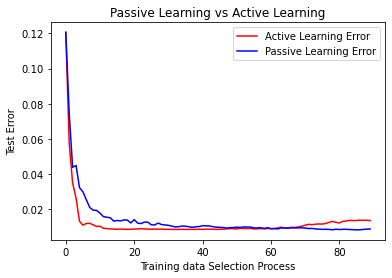

In [59]:
plt.plot(np.array(range(0,90)), act_array, 'r', label = 'Active Learning Error')
plt.plot(np.array(range(0,90)), pas_array, 'b', label = 'Passive Learning Error')
plt.title('Passive Learning vs Active Learning')
plt.legend() 
plt.xlabel('Training data Selection Process')
plt.ylabel('Test Error')

    Active learning has a faster error decreasing process than Passive learning but has a worse performance (higher error) at the final situation (select all data).